In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [13]:
!pip install tensorflow-datasets

In [14]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [16]:
IMG_SIZE = 150
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

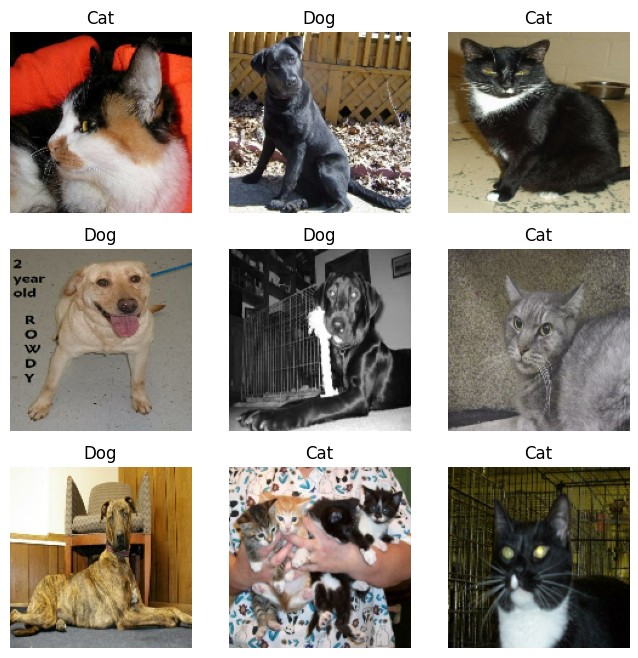

In [17]:
plt.figure(figsize=(8, 8))

for i, (image, label) in enumerate(ds_train.unbatch().take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title("Dog" if label.numpy() == 1 else "Cat")
    plt.axis("off")

plt.show()

# Model Building

In [20]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,402,817 (20.61 MB)

 Trainable params: 5,402,369 (20.61 MB)

 Non-trainable params: 448 (1.75 KB)

# Training the Model

In [23]:
EPOCHS = 10

history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=EPOCHS
)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.5384 - loss: 2.0645 - val_accuracy: 0.6219 - val_loss: 0.6787
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.6057 - loss: 0.6418 - val_accuracy: 0.4901 - val_loss: 0.8773
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.6542 - loss: 0.5988 - val_accuracy: 0.5099 - val_loss: 4.8976
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.6819 - loss: 0.5705 - val_accuracy: 0.5099 - val_loss: 9.8599
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.7148 - loss: 0.5404 - val_accuracy: 0.4901 - val_loss: 10.8593
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7214 - loss: 0.5280 - val_accuracy: 0.4901 - val_loss: 11.9715
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.7320 - loss: 0.5109 - val_accuracy: 0.4901 - val_loss: 5.9229
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.7413 - loss: 0.4944 

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

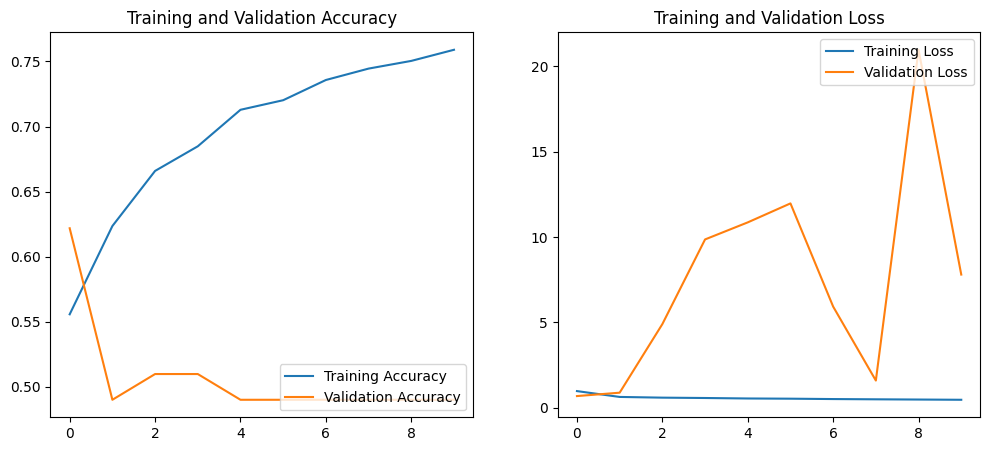

In [25]:
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()